k# Requirements

In [2]:
# Add as many imports as you need.
import pandas as pd

from VNP.packages.data_alalysis import *
from VNP.packages.data_preperation import *
from VNP.packages.missing_values import *
from VNP.packages.visualization import *
from VNP.packages.models import *
from VNP.packages.evaluation import *
%load_ext autoreload
%autoreload 2

# Laboratory Exercise - Run Mode (8 points)

## The Mental Health Diagnosis and Treatment Monitoring Dataset
The dataset contains information on 500 individuals, focusing on mental health diagnoses, treatment plans, and outcomes. Key features include patient demographics such as age and gender, as well as specific mental health conditions (e.g., anxiety, depression, etc.). The dataset also captures symptom severity, mood scores, sleep quality, and stress levels, all rated on a scale of 1 to 10, providing insight into the patient's mental and physical well-being. Additionally, it includes details on treatment plans, including prescribed medications (e.g., SSRIs, antidepressants, etc.), therapy types (e.g., CBT, DBT, etc.), and treatment duration. Progress tracking is also incorporated, with ratings for treatment progress and AI-detected emotional state, alongside adherence to the treatment plan. The 'outcome' attribute, which indicates whether the treatment was improved, deteriorated, or unaffected, serves as the target variable for the analysis, while the remaining attributes can be used to explore and model the factors affecting mental health treatment outcomes.

In [1]:
from VNP.packages.vnp_ez import *

Load the dataset into a `pandas` data frame.

In [2]:
import pandas as pd

# Write your code here. Add as many boxes as you need.
df = pd.read_csv("./data/mental_health_diagnosis_treatment_data.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Patient ID                    500 non-null    int64  
 1   Age                           475 non-null    float64
 2   Gender                        500 non-null    object 
 3   Diagnosis                     500 non-null    object 
 4   Symptom Severity (1-10)       500 non-null    int64  
 5   Mood Score (1-10)             500 non-null    int64  
 6   Sleep Quality (1-10)          500 non-null    int64  
 7   Physical Activity (hrs/week)  450 non-null    float64
 8   Medication                    500 non-null    object 
 9   Therapy Type                  500 non-null    object 
 10  Treatment Start Date          500 non-null    object 
 11  Treatment Duration (weeks)    500 non-null    int64  
 12  Stress Level (1-10)           400 non-null    float64
 13  Outco

In [4]:
df.drop(columns=["Patient ID", "Treatment Start Date"], inplace=True)

In [5]:
df

,Age,Gender,Diagnosis,Symptom Severity (1-10),Mood Score (1-10),Sleep Quality (1-10),Physical Activity (hrs/week),Medication,Therapy Type,Treatment Duration (weeks),Stress Level (1-10),Outcome,Treatment Progress (1-10),AI-Detected Emotional State,Adherence to Treatment (%)
0,43.0,Female,Major Depressive Disorder,10,5,8,NaN,Mood Stabilizers,Interpersonal Therapy,11,NaN,Deteriorated,7,Anxious,66
1,40.0,Female,Major Depressive Disorder,9,5,4,7.0,Antipsychotics,Interpersonal Therapy,11,7.0,No Change,7,Neutral,78
2,55.0,Female,Major Depressive Disorder,6,3,4,NaN,SSRIs,Mindfulness-Based Therapy,14,NaN,Deteriorated,5,Happy,62
3,34.0,Female,Major Depressive Disorder,6,3,6,5.0,SSRIs,Mindfulness-Based Therapy,8,8.0,Deteriorated,10,Excited,72
4,52.0,Male,Panic Disorder,7,6,6,8.0,Anxiolytics,Interpersonal Therapy,12,5.0,Deteriorated,6,Excited,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,NaN,Male,Generalized Anxiety,10,4,8,NaN,Mood Stabilizers,Dialectical Behavioral Therapy,8,NaN,Improved,10,Depressed,73
496,22.0,Male,Panic Disorder,5,6,6,7.0,Benzodiazepines,Mindfulness-Based Therapy,13,6.0,Deteriorated,8,Happy,86
497,23.0,Male,Major Depressive Disorder,7,3,4,NaN,Antidepressants,Cognitive Behavioral Therapy,10,NaN,Deteriorated,5,Neutral,87
498,48.0,Male,Bipolar Disorder,9,4,6,9.0,Antidepressants,Mindfulness-Based Therapy,10,6.0,Improved,7,Anxious,73


In [8]:
cat_features = get_categorical_features_names(df, "Outcome")

In [9]:
encoded_df, encoders =  encode_data(df,cat_features)

In [10]:
encoded_df

,Age,Gender,Diagnosis,Symptom Severity (1-10),Mood Score (1-10),Sleep Quality (1-10),Physical Activity (hrs/week),Medication,Therapy Type,Treatment Duration (weeks),Stress Level (1-10),Outcome,Treatment Progress (1-10),AI-Detected Emotional State,Adherence to Treatment (%)
0,43.0,0.0,2.0,10,5,8,NaN,4.0,2.0,11,NaN,Deteriorated,7,0.0,66
1,40.0,0.0,2.0,9,5,4,7.0,1.0,2.0,11,7.0,No Change,7,4.0,78
2,55.0,0.0,2.0,6,3,4,NaN,5.0,3.0,14,NaN,Deteriorated,5,3.0,62
3,34.0,0.0,2.0,6,3,6,5.0,5.0,3.0,8,8.0,Deteriorated,10,2.0,72
4,52.0,1.0,3.0,7,6,6,8.0,2.0,2.0,12,5.0,Deteriorated,6,2.0,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,NaN,1.0,1.0,10,4,8,NaN,4.0,1.0,8,NaN,Improved,10,1.0,73
496,22.0,1.0,3.0,5,6,6,7.0,3.0,3.0,13,6.0,Deteriorated,8,3.0,86
497,23.0,1.0,2.0,7,3,4,NaN,0.0,0.0,10,NaN,Deteriorated,5,4.0,87
498,48.0,1.0,0.0,9,4,6,9.0,0.0,3.0,10,6.0,Improved,7,0.0,73


Preprocess the input and the output variables appropriately.

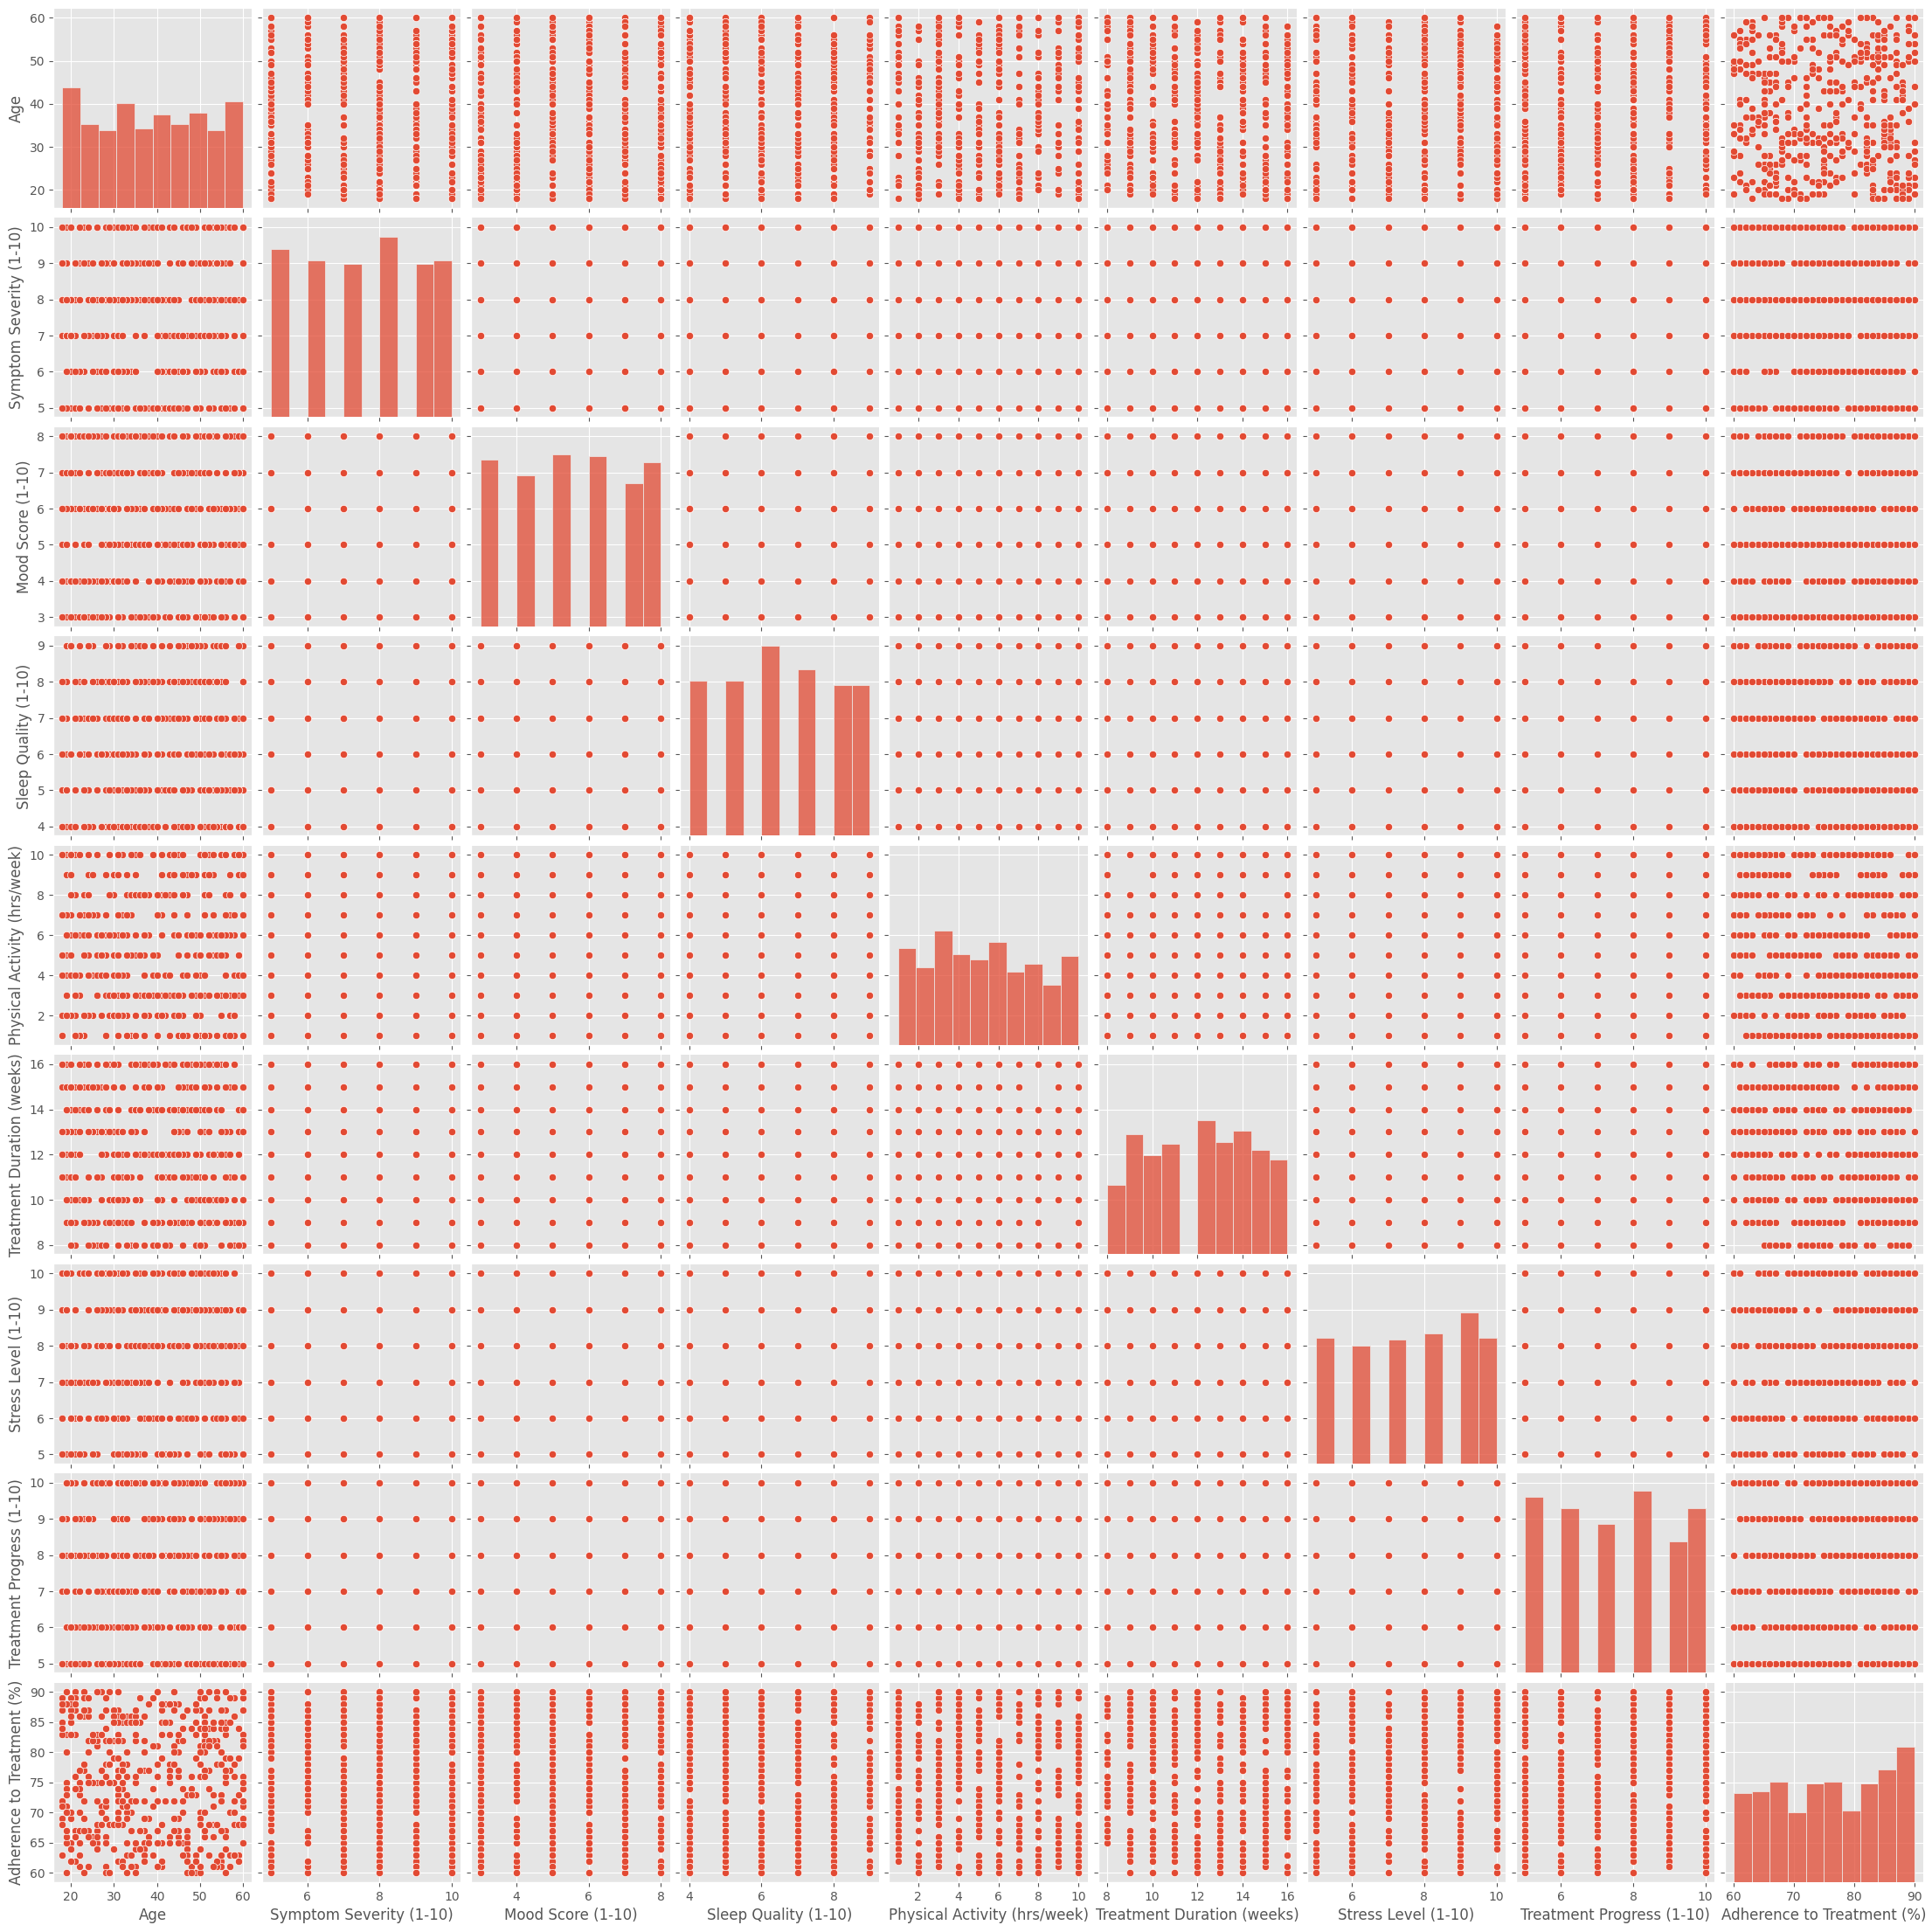

In [7]:
sns.pairplot(df)

In [8]:
numerical_features_names = get_numerical_features_names(df)
numerical_features_names

['Age',
 'Symptom Severity (1-10)',
 'Mood Score (1-10)',
 'Sleep Quality (1-10)',
 'Physical Activity (hrs/week)',
 'Treatment Duration (weeks)',
 'Stress Level (1-10)',
 'Treatment Progress (1-10)',
 'Adherence to Treatment (%)']

<Axes: >

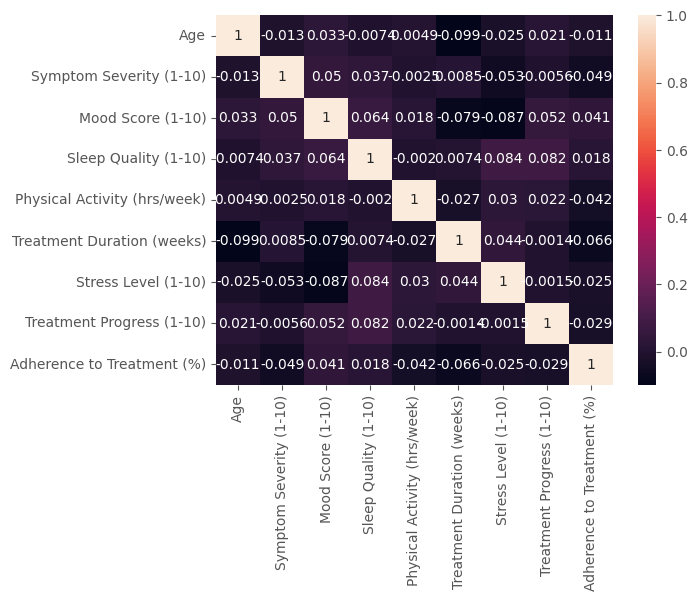

In [9]:
sns.heatmap(df.drop(
    columns=["Gender", "Diagnosis", "Medication", "Therapy Type", "Outcome", "AI-Detected Emotional State"]).corr(),
            annot=True)

In [10]:
# Write your code here. Add as many boxes as you need.

Explore the dataset using visualizations of your choice.

In [11]:
# Write your code here. Add as many boxes as you need.
sns

<module 'seaborn' from 'D:\\Fax\\LAIP\\.venv\\Lib\\site-packages\\seaborn\\__init__.py'>

Check if the dataset is balanced.

In [12]:
# Write your code here. Add as many boxes as you need.
balance_table(df, target_column="Outcome")

,Class,Count,Percentage,Total
0,Deteriorated,171,34.2,500
1,Improved,170,34.0,500
2,No Change,159,31.8,500


## Detecting Missing Values
Calculate the percentage of missing values present in each column of the dataset.

In [13]:
# Write your code here. Add as many boxes as you need.
missing_table(df)

,Feature,CountMissing,PercentageMissing,Total
0,Age,25,5.0,500
1,Gender,0,0.0,500
2,Diagnosis,0,0.0,500
3,Symptom Severity (1-10),0,0.0,500
4,Mood Score (1-10),0,0.0,500
5,Sleep Quality (1-10),0,0.0,500
6,Physical Activity (hrs/week),50,10.0,500
7,Medication,0,0.0,500
8,Therapy Type,0,0.0,500
9,Treatment Duration (weeks),0,0.0,500


<Axes: >

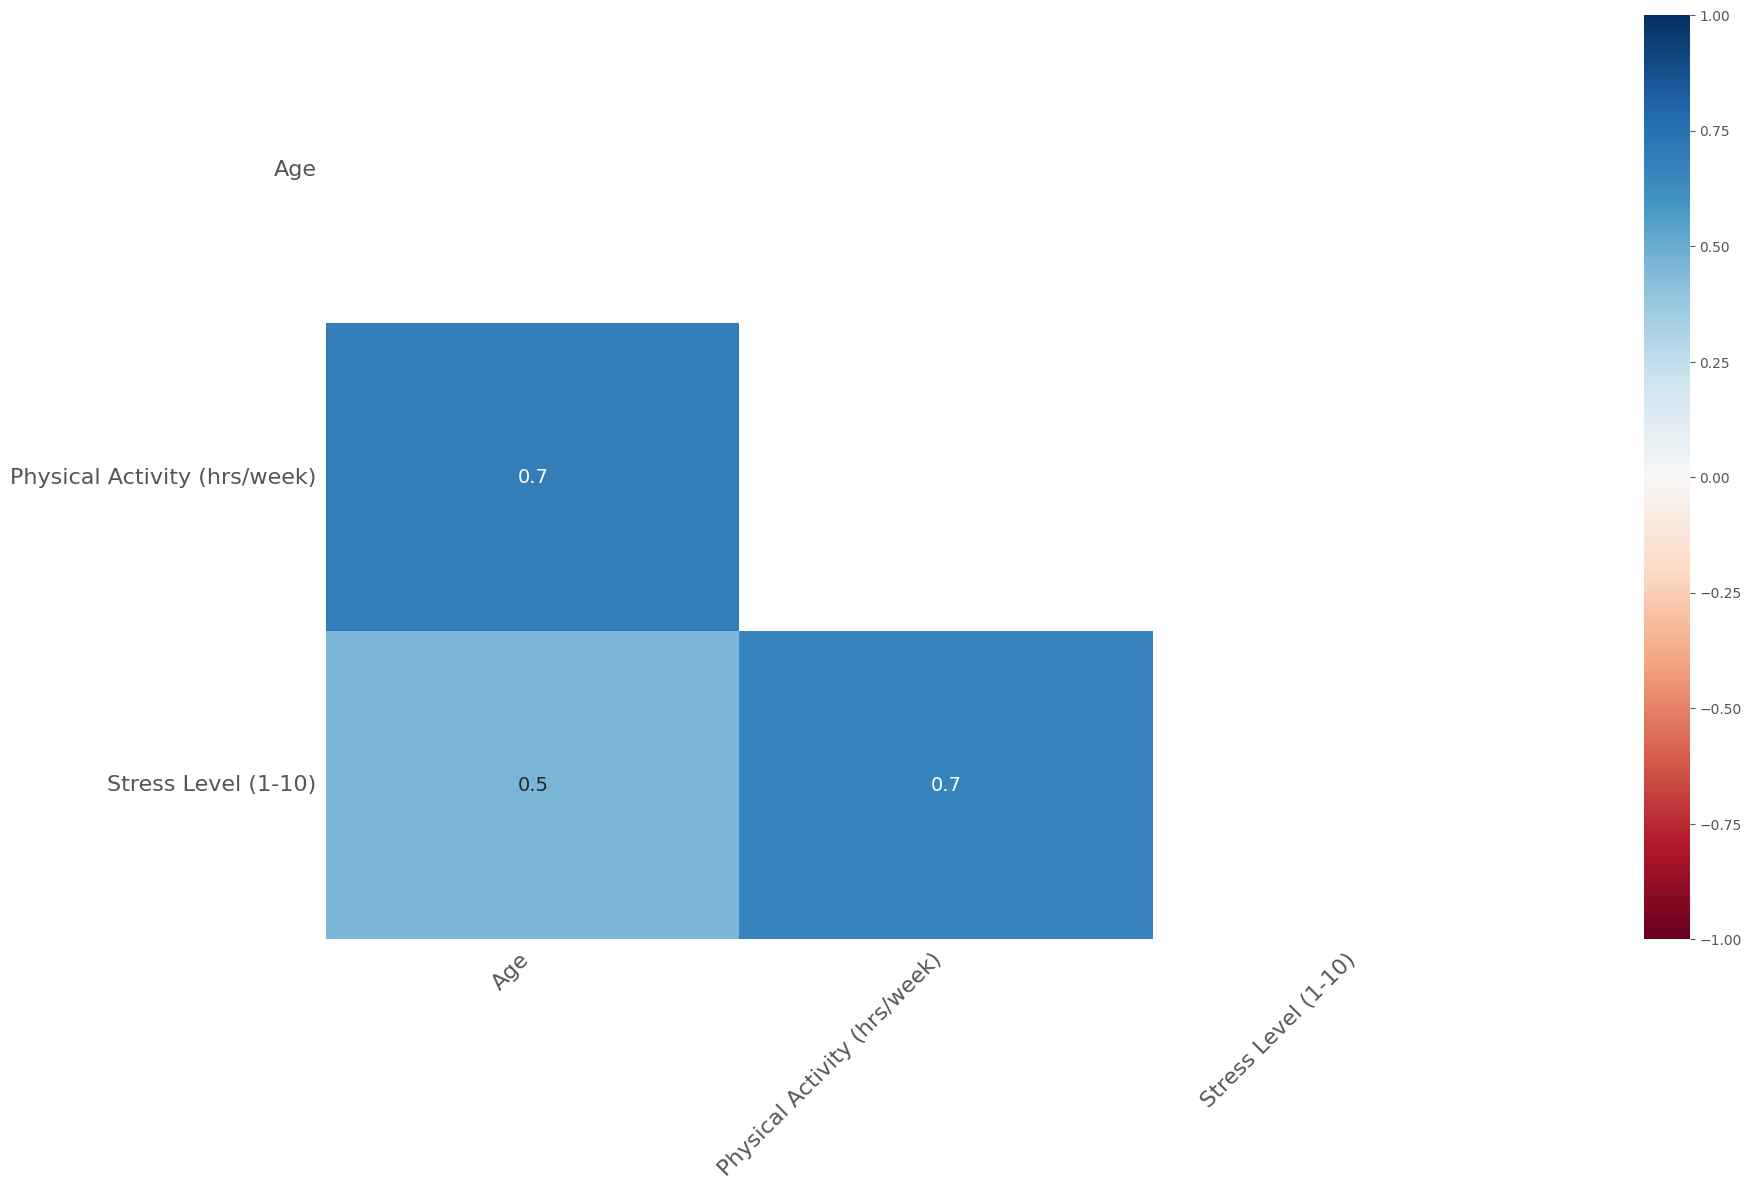

In [14]:
msno.heatmap(df)

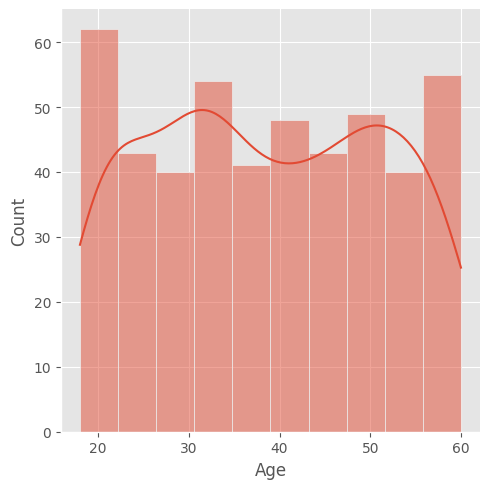

In [15]:
show_displots(df, columns=["Age"])

In [16]:
df.columns

Index(['Age', 'Gender', 'Diagnosis', 'Symptom Severity (1-10)',
       'Mood Score (1-10)', 'Sleep Quality (1-10)',
       'Physical Activity (hrs/week)', 'Medication', 'Therapy Type',
       'Treatment Duration (weeks)', 'Stress Level (1-10)', 'Outcome',
       'Treatment Progress (1-10)', 'AI-Detected Emotional State',
       'Adherence to Treatment (%)'],
      dtype='object')

In [17]:
df_copy = correlated_imputer(df, correlated_columns=["Age", "Physical Activity (hrs/week)", "Stress Level (1-10)"],
                             strategy="mice")
df_copy

,Age,Gender,Diagnosis,Symptom Severity (1-10),Mood Score (1-10),Sleep Quality (1-10),Physical Activity (hrs/week),Medication,Therapy Type,Treatment Duration (weeks),Stress Level (1-10),Outcome,Treatment Progress (1-10),AI-Detected Emotional State,Adherence to Treatment (%)
0,43.000000,Female,Major Depressive Disorder,10,5,8,5.276754,Mood Stabilizers,Interpersonal Therapy,11,7.563999,Deteriorated,7,Anxious,66
1,40.000000,Female,Major Depressive Disorder,9,5,4,7.000000,Antipsychotics,Interpersonal Therapy,11,7.000000,No Change,7,Neutral,78
2,55.000000,Female,Major Depressive Disorder,6,3,4,5.279855,SSRIs,Mindfulness-Based Therapy,14,7.555219,Deteriorated,5,Happy,62
3,34.000000,Female,Major Depressive Disorder,6,3,6,5.000000,SSRIs,Mindfulness-Based Therapy,8,8.000000,Deteriorated,10,Excited,72
4,52.000000,Male,Panic Disorder,7,6,6,8.000000,Anxiolytics,Interpersonal Therapy,12,5.000000,Deteriorated,6,Excited,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,38.623158,Male,Generalized Anxiety,10,4,8,5.275623,Mood Stabilizers,Dialectical Behavioral Therapy,8,7.567202,Improved,10,Depressed,73
496,22.000000,Male,Panic Disorder,5,6,6,7.000000,Benzodiazepines,Mindfulness-Based Therapy,13,6.000000,Deteriorated,8,Happy,86
497,23.000000,Male,Major Depressive Disorder,7,3,4,5.271586,Antidepressants,Cognitive Behavioral Therapy,10,7.578634,Deteriorated,5,Neutral,87
498,48.000000,Male,Bipolar Disorder,9,4,6,9.000000,Antidepressants,Mindfulness-Based Therapy,10,6.000000,Improved,7,Anxious,73


In [18]:
missing_table(df_copy)

,Feature,CountMissing,PercentageMissing,Total
0,Age,0,0.0,500
1,Gender,0,0.0,500
2,Diagnosis,0,0.0,500
3,Symptom Severity (1-10),0,0.0,500
4,Mood Score (1-10),0,0.0,500
5,Sleep Quality (1-10),0,0.0,500
6,Physical Activity (hrs/week),0,0.0,500
7,Medication,0,0.0,500
8,Therapy Type,0,0.0,500
9,Treatment Duration (weeks),0,0.0,500


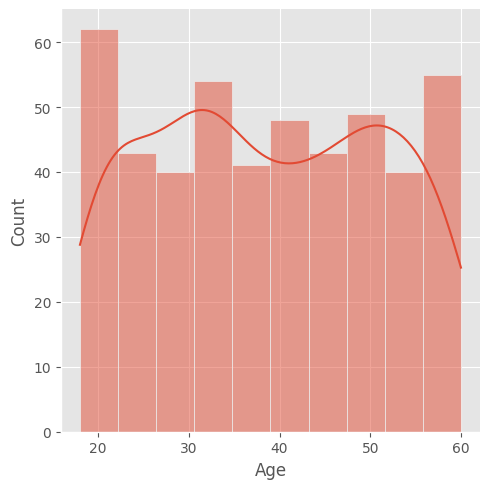

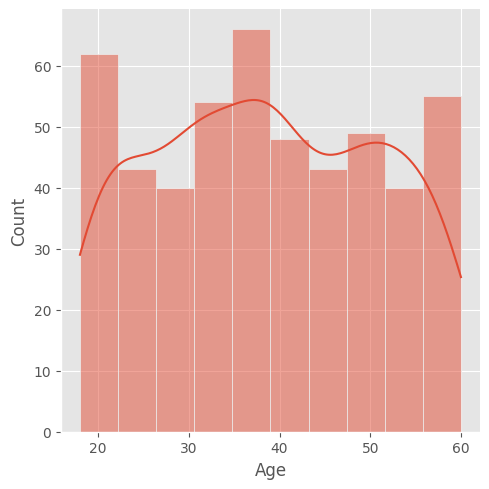

In [19]:
show_displot_before_and_after_inputation(df, df_copy, missing_feature_name="Age")

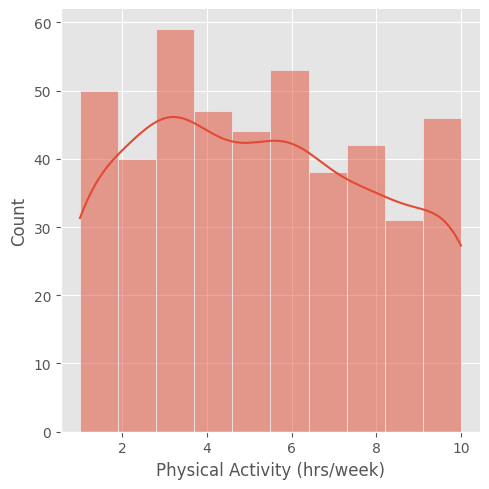

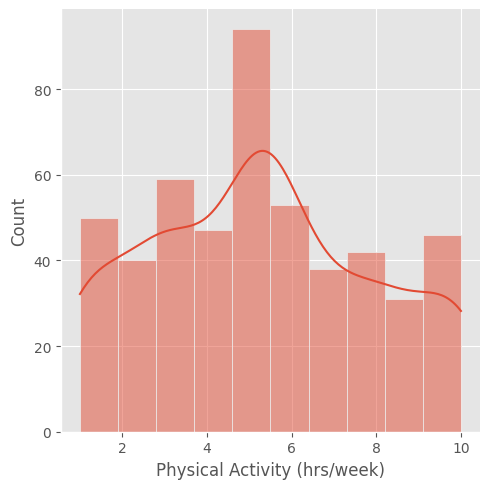

In [20]:
show_displot_before_and_after_inputation(df, df_copy, missing_feature_name="Physical Activity (hrs/week)")


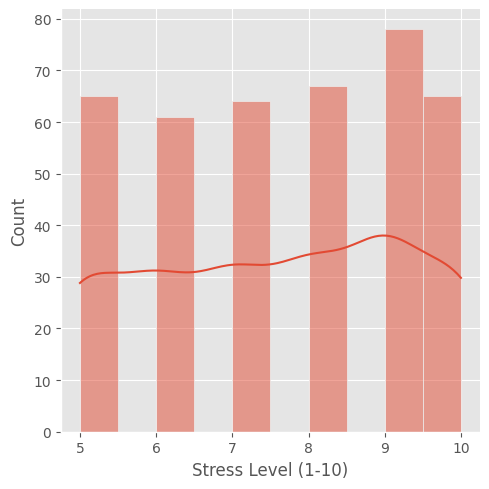

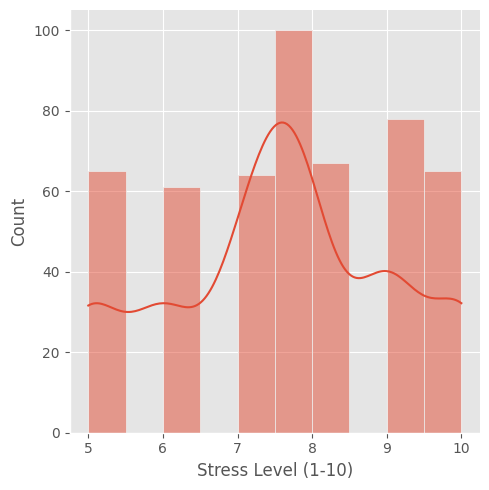

In [21]:
show_displot_before_and_after_inputation(df, df_copy, missing_feature_name="Stress Level (1-10)")


## Understanding the Causes Behind Missing Values
Using visualization tools such as heatmaps, and dendrograms, illustrate the interdependence between attributes with missing values. Also, visualize the distribution of the missing values within the dataset using matrices and bar charts.

In [22]:
# Write your code here. Add as many boxes as you need.

## Handling the Missing Values
Handle the missing values using suitable method based on the insights obtained from the various visualizations.

In [23]:
# Write your code here. Add as many boxes as you need.

## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

In [24]:
df_copy["Diagnosis"]

0      Major Depressive Disorder
1      Major Depressive Disorder
2      Major Depressive Disorder
3      Major Depressive Disorder
4                 Panic Disorder
                 ...            
495          Generalized Anxiety
496               Panic Disorder
497    Major Depressive Disorder
498             Bipolar Disorder
499             Bipolar Disorder
Name: Diagnosis, Length: 500, dtype: object

In [25]:
# Write your code here. Add as many boxes as you need.
X = df_copy.drop(columns="Outcome")
Y = df_copy["Outcome"]

In [26]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True, random_state=0)

In [27]:
x_train

,Age,Gender,Diagnosis,Symptom Severity (1-10),Mood Score (1-10),Sleep Quality (1-10),Physical Activity (hrs/week),Medication,Therapy Type,Treatment Duration (weeks),Stress Level (1-10),Treatment Progress (1-10),AI-Detected Emotional State,Adherence to Treatment (%)
107,30.0,Male,Generalized Anxiety,9,7,7,8.000000,Mood Stabilizers,Interpersonal Therapy,13,6.000000,7,Neutral,79
336,60.0,Male,Generalized Anxiety,10,8,9,5.281147,Mood Stabilizers,Interpersonal Therapy,15,7.551560,8,Happy,71
71,57.0,Male,Major Depressive Disorder,5,4,5,3.000000,Antipsychotics,Mindfulness-Based Therapy,13,5.000000,10,Excited,61
474,20.0,Male,Generalized Anxiety,7,7,9,9.000000,SSRIs,Cognitive Behavioral Therapy,15,8.000000,6,Stressed,62
6,59.0,Male,Generalized Anxiety,6,6,5,3.000000,Mood Stabilizers,Dialectical Behavioral Therapy,13,8.000000,5,Anxious,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,33.0,Male,Panic Disorder,6,8,8,1.000000,Mood Stabilizers,Cognitive Behavioral Therapy,9,7.570263,5,Depressed,85
192,47.0,Male,Bipolar Disorder,10,3,7,8.000000,Mood Stabilizers,Mindfulness-Based Therapy,14,9.000000,8,Depressed,64
117,31.0,Male,Bipolar Disorder,5,7,8,3.000000,Antidepressants,Interpersonal Therapy,8,5.000000,9,Depressed,87
47,26.0,Male,Generalized Anxiety,6,3,5,6.000000,Benzodiazepines,Interpersonal Therapy,16,9.000000,6,Neutral,90


## Feature Scaling
Standardize the features appropriately.

In [28]:
numerical_features = get_numerical_features_names(df)
numerical_features_names

['Age',
 'Symptom Severity (1-10)',
 'Mood Score (1-10)',
 'Sleep Quality (1-10)',
 'Physical Activity (hrs/week)',
 'Treatment Duration (weeks)',
 'Stress Level (1-10)',
 'Treatment Progress (1-10)',
 'Adherence to Treatment (%)']

In [29]:
# Write your code here. Add as many boxes as you need.
# scaler = StandardScaler()
# scaler.fit(x_train[numerical_features])

In [30]:
# x_train[numerical_features_names] = scaler.transform(x_train[numerical_features_names])

In [31]:
# x_test[numerical_features_names] = scaler.transform(x_test[numerical_features_names])


In [32]:
x_train

,Age,Gender,Diagnosis,Symptom Severity (1-10),Mood Score (1-10),Sleep Quality (1-10),Physical Activity (hrs/week),Medication,Therapy Type,Treatment Duration (weeks),Stress Level (1-10),Treatment Progress (1-10),AI-Detected Emotional State,Adherence to Treatment (%)
107,30.0,Male,Generalized Anxiety,9,7,7,8.000000,Mood Stabilizers,Interpersonal Therapy,13,6.000000,7,Neutral,79
336,60.0,Male,Generalized Anxiety,10,8,9,5.281147,Mood Stabilizers,Interpersonal Therapy,15,7.551560,8,Happy,71
71,57.0,Male,Major Depressive Disorder,5,4,5,3.000000,Antipsychotics,Mindfulness-Based Therapy,13,5.000000,10,Excited,61
474,20.0,Male,Generalized Anxiety,7,7,9,9.000000,SSRIs,Cognitive Behavioral Therapy,15,8.000000,6,Stressed,62
6,59.0,Male,Generalized Anxiety,6,6,5,3.000000,Mood Stabilizers,Dialectical Behavioral Therapy,13,8.000000,5,Anxious,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,33.0,Male,Panic Disorder,6,8,8,1.000000,Mood Stabilizers,Cognitive Behavioral Therapy,9,7.570263,5,Depressed,85
192,47.0,Male,Bipolar Disorder,10,3,7,8.000000,Mood Stabilizers,Mindfulness-Based Therapy,14,9.000000,8,Depressed,64
117,31.0,Male,Bipolar Disorder,5,7,8,3.000000,Antidepressants,Interpersonal Therapy,8,5.000000,9,Depressed,87
47,26.0,Male,Generalized Anxiety,6,3,5,6.000000,Benzodiazepines,Interpersonal Therapy,16,9.000000,6,Neutral,90


In [33]:
x_test

,Age,Gender,Diagnosis,Symptom Severity (1-10),Mood Score (1-10),Sleep Quality (1-10),Physical Activity (hrs/week),Medication,Therapy Type,Treatment Duration (weeks),Stress Level (1-10),Treatment Progress (1-10),AI-Detected Emotional State,Adherence to Treatment (%)
90,55.0,Female,Generalized Anxiety,9,6,8,5.000000,SSRIs,Dialectical Behavioral Therapy,16,7.555150,7,Stressed,87
254,55.0,Female,Panic Disorder,7,5,9,3.000000,SSRIs,Interpersonal Therapy,12,6.000000,8,Stressed,85
283,44.0,Female,Bipolar Disorder,7,8,8,8.000000,Mood Stabilizers,Interpersonal Therapy,9,5.000000,8,Stressed,72
445,35.0,Female,Bipolar Disorder,6,8,8,1.000000,Antipsychotics,Interpersonal Therapy,16,10.000000,7,Stressed,87
461,25.0,Female,Bipolar Disorder,8,8,8,5.272103,Antipsychotics,Mindfulness-Based Therapy,13,7.577170,8,Excited,83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,45.0,Female,Generalized Anxiety,5,4,7,5.000000,SSRIs,Cognitive Behavioral Therapy,15,10.000000,9,Neutral,80
56,43.0,Male,Panic Disorder,8,4,5,8.000000,Antipsychotics,Interpersonal Therapy,16,6.000000,8,Anxious,83
440,40.0,Male,Panic Disorder,9,6,8,5.275979,Mood Stabilizers,Mindfulness-Based Therapy,10,7.566194,7,Excited,90
60,56.0,Female,Generalized Anxiety,9,8,7,1.000000,Benzodiazepines,Interpersonal Therapy,10,6.000000,9,Depressed,87


## Model Selection

In [34]:
label_encoder = LabelEncoder()

In [35]:
def label_enode_this_shit(data:pd.DataFrame, labels:list):
    data_copy = data.copy()
    encoder = LabelEncoder()
    for label in labels:
        data_copy[label] = encoder.fit_transform(data_copy[label])
    return data_copy

In [36]:
categorical_features = ["Gender", "Diagnosis", "Medication", "Therapy Type", "AI-Detected Emotional State"]

In [37]:
df_copy_1 = label_enode_this_shit(df_copy, categorical_features)

In [38]:
x_train = label_enode_this_shit(x_train, categorical_features)
x_test = label_enode_this_shit(x_test, categorical_features)

In [39]:
x_train

,Age,Gender,Diagnosis,Symptom Severity (1-10),Mood Score (1-10),Sleep Quality (1-10),Physical Activity (hrs/week),Medication,Therapy Type,Treatment Duration (weeks),Stress Level (1-10),Treatment Progress (1-10),AI-Detected Emotional State,Adherence to Treatment (%)
107,30.0,1,1,9,7,7,8.000000,4,2,13,6.000000,7,4,79
336,60.0,1,1,10,8,9,5.281147,4,2,15,7.551560,8,3,71
71,57.0,1,2,5,4,5,3.000000,1,3,13,5.000000,10,2,61
474,20.0,1,1,7,7,9,9.000000,5,0,15,8.000000,6,5,62
6,59.0,1,1,6,6,5,3.000000,4,1,13,8.000000,5,0,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,33.0,1,3,6,8,8,1.000000,4,0,9,7.570263,5,1,85
192,47.0,1,0,10,3,7,8.000000,4,3,14,9.000000,8,1,64
117,31.0,1,0,5,7,8,3.000000,0,2,8,5.000000,9,1,87
47,26.0,1,1,6,3,5,6.000000,3,2,16,9.000000,6,4,90


In [40]:
x_test

,Age,Gender,Diagnosis,Symptom Severity (1-10),Mood Score (1-10),Sleep Quality (1-10),Physical Activity (hrs/week),Medication,Therapy Type,Treatment Duration (weeks),Stress Level (1-10),Treatment Progress (1-10),AI-Detected Emotional State,Adherence to Treatment (%)
90,55.0,0,1,9,6,8,5.000000,5,1,16,7.555150,7,5,87
254,55.0,0,3,7,5,9,3.000000,5,2,12,6.000000,8,5,85
283,44.0,0,0,7,8,8,8.000000,4,2,9,5.000000,8,5,72
445,35.0,0,0,6,8,8,1.000000,1,2,16,10.000000,7,5,87
461,25.0,0,0,8,8,8,5.272103,1,3,13,7.577170,8,2,83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,45.0,0,1,5,4,7,5.000000,5,0,15,10.000000,9,4,80
56,43.0,1,3,8,4,5,8.000000,1,2,16,6.000000,8,0,83
440,40.0,1,3,9,6,8,5.275979,4,3,10,7.566194,7,2,90
60,56.0,0,1,9,8,7,1.000000,3,2,10,6.000000,9,1,87


In [41]:
# Write your code here. Add as many boxes as you need.
scaler = StandardScaler()

x_train[x_train.columns] = scaler.fit_transform(x_train[x_train.columns])
x_test[x_train.columns] = scaler.transform(x_test[x_train.columns])


In [42]:
x_train

,Age,Gender,Diagnosis,Symptom Severity (1-10),Mood Score (1-10),Sleep Quality (1-10),Physical Activity (hrs/week),Medication,Therapy Type,Treatment Duration (weeks),Stress Level (1-10),Treatment Progress (1-10),AI-Detected Emotional State,Adherence to Treatment (%)
107,-0.703374,0.922958,-0.454943,0.889531,0.876486,0.314443,1.015394,0.814415,0.469145,0.345296,-1.041136,-0.228106,0.887297,0.418815
336,1.707187,0.922958,-0.454943,1.473788,1.464731,1.506643,0.007533,0.814415,0.469145,1.172351,-0.000397,0.342160,0.303549,-0.448633
71,1.466131,0.922958,0.450416,-1.447496,-0.888251,-0.877757,-0.838073,-0.937016,1.358519,0.345296,-1.711906,1.482691,-0.280199,-1.532944
474,-1.506894,0.922958,-0.454943,-0.278983,0.876486,1.506643,1.386088,1.398226,-1.309604,1.172351,0.300403,-0.798372,1.471045,-1.424513
6,1.626835,0.922958,-0.454943,-0.863239,0.288240,-0.877757,-0.838073,0.814415,-0.420229,0.345296,0.300403,-1.368638,-1.447695,0.418815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,-0.462318,0.922958,1.355776,-0.863239,1.464731,0.910543,-1.579460,0.814415,-1.309604,-1.308815,0.012149,-1.368638,-0.863947,1.069401
192,0.662610,0.922958,-1.360303,1.473788,-1.476496,0.314443,1.015394,0.814415,1.358519,0.758823,0.971173,0.342160,-0.863947,-1.207651
117,-0.623022,0.922958,-1.360303,-1.447496,0.876486,0.910543,-0.838073,-1.520826,0.469145,-1.722343,-1.711906,0.912426,-0.863947,1.286263
47,-1.024782,0.922958,-0.454943,-0.863239,-1.476496,-0.877757,0.274008,0.230605,0.469145,1.585879,0.971173,-0.798372,0.887297,1.611556


In [43]:
x_test

,Age,Gender,Diagnosis,Symptom Severity (1-10),Mood Score (1-10),Sleep Quality (1-10),Physical Activity (hrs/week),Medication,Therapy Type,Treatment Duration (weeks),Stress Level (1-10),Treatment Progress (1-10),AI-Detected Emotional State,Adherence to Treatment (%)
90,1.305427,-1.083473,-0.454943,0.889531,0.288240,0.910543,-0.096686,1.398226,-0.420229,1.585879,0.002011,-0.228106,1.471045,1.286263
254,1.305427,-1.083473,1.355776,-0.278983,-0.300005,1.506643,-0.838073,1.398226,0.469145,-0.068232,-1.041136,0.342160,1.471045,1.069401
283,0.421554,-1.083473,-1.360303,-0.278983,1.464731,0.910543,1.015394,0.814415,0.469145,-1.308815,-1.711906,0.342160,1.471045,-0.340202
445,-0.301614,-1.083473,-1.360303,-0.863239,1.464731,0.910543,-1.579460,-0.937016,0.469145,1.585879,1.641943,-0.228106,1.471045,1.286263
461,-1.105134,-1.083473,-1.360303,0.305274,1.464731,0.910543,0.004181,-0.937016,1.358519,0.345296,0.016782,0.342160,-0.280199,0.852539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,0.501906,-1.083473,-0.454943,-1.447496,-0.888251,0.314443,-0.096686,1.398226,-1.309604,1.172351,1.641943,0.912426,0.887297,0.527246
56,0.341202,0.922958,1.355776,0.305274,-0.888251,-0.877757,1.015394,-0.937016,0.469145,1.585879,-1.041136,0.342160,-1.447695,0.852539
440,0.100146,0.922958,1.355776,0.889531,0.288240,0.910543,0.005618,0.814415,1.358519,-0.895288,0.009420,-0.228106,-0.280199,1.611556
60,1.385779,-1.083473,-0.454943,0.889531,1.464731,0.314443,-1.579460,0.230605,0.469145,-0.895288,-1.041136,0.912426,-0.863947,1.286263


In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
from sklearn.naive_bayes import CategoricalNB

Choose and train an approriate model for the given task.

In [46]:
# Write your code here. Add as many boxes as you need.
# random_forest_classifier = RandomForestClassifier(max_depth=9, n_estimators=50, random_state=0)
random_forest_classifier = RandomForestClassifier()

Use the trained model to make predictions for the test set.

In [47]:
x_train

,Age,Gender,Diagnosis,Symptom Severity (1-10),Mood Score (1-10),Sleep Quality (1-10),Physical Activity (hrs/week),Medication,Therapy Type,Treatment Duration (weeks),Stress Level (1-10),Treatment Progress (1-10),AI-Detected Emotional State,Adherence to Treatment (%)
107,-0.703374,0.922958,-0.454943,0.889531,0.876486,0.314443,1.015394,0.814415,0.469145,0.345296,-1.041136,-0.228106,0.887297,0.418815
336,1.707187,0.922958,-0.454943,1.473788,1.464731,1.506643,0.007533,0.814415,0.469145,1.172351,-0.000397,0.342160,0.303549,-0.448633
71,1.466131,0.922958,0.450416,-1.447496,-0.888251,-0.877757,-0.838073,-0.937016,1.358519,0.345296,-1.711906,1.482691,-0.280199,-1.532944
474,-1.506894,0.922958,-0.454943,-0.278983,0.876486,1.506643,1.386088,1.398226,-1.309604,1.172351,0.300403,-0.798372,1.471045,-1.424513
6,1.626835,0.922958,-0.454943,-0.863239,0.288240,-0.877757,-0.838073,0.814415,-0.420229,0.345296,0.300403,-1.368638,-1.447695,0.418815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,-0.462318,0.922958,1.355776,-0.863239,1.464731,0.910543,-1.579460,0.814415,-1.309604,-1.308815,0.012149,-1.368638,-0.863947,1.069401
192,0.662610,0.922958,-1.360303,1.473788,-1.476496,0.314443,1.015394,0.814415,1.358519,0.758823,0.971173,0.342160,-0.863947,-1.207651
117,-0.623022,0.922958,-1.360303,-1.447496,0.876486,0.910543,-0.838073,-1.520826,0.469145,-1.722343,-1.711906,0.912426,-0.863947,1.286263
47,-1.024782,0.922958,-0.454943,-0.863239,-1.476496,-0.877757,0.274008,0.230605,0.469145,1.585879,0.971173,-0.798372,0.887297,1.611556


In [48]:
y_train_encoded = pd.Series(label_encoder.fit_transform(y_train))

In [49]:
y_train_encoded

0      1
1      2
2      2
3      2
4      0
      ..
395    1
396    1
397    1
398    2
399    1
Length: 400, dtype: int64

In [50]:
y_test_encoded = pd.Series(label_encoder.transform(y_test))


In [51]:
# Write your code here. Add as many boxes as you need.
random_forest_classifier.fit(x_train, y_train_encoded)

RandomForestClassifier()

Assess the performance of the model by using different classification metrics.

In [52]:
# Write your code here. Add as many boxes as you need.
predict = random_forest_classifier.predict(x_test)

In [53]:
print(classification_report(y_test_encoded, predict))

              precision    recall  f1-score   support

           0       0.20      0.46      0.28        24
           1       0.38      0.23      0.28        40
           2       0.43      0.25      0.32        36

    accuracy                           0.29       100
   macro avg       0.33      0.31      0.29       100
weighted avg       0.35      0.29      0.29       100



In [54]:
predict_test = random_forest_classifier.predict(x_train)
print(classification_report(y_train_encoded, predict_test))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       147
           1       1.00      1.00      1.00       130
           2       1.00      1.00      1.00       123

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



# Laboratory Exercise - Bonus Task (+ 2 points)

As part of the bonus task in this laboratory assignment, your objective is to fine-tune at least one hyper-parameter using a cross-validation with grid search. This involves systematically experimenting with various values for the hyper-parameter(s) and evaluating the model's performance using cross-validation. Upon determining the most suitable value(s) for the hyper-parameter(s), evaluate the model's performance on a test set for final assessment.

Hint: Use the `GridCVSearch` from the `scikit-learn` library. Check the documentation at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html.

## Dataset Splitting
Partition the dataset into training and testing sets with an 90:10 ratio.

In [55]:
# Write your code here. Add as many boxes as you need.


## Feature Scaling
Standardize the features appropriately.

In [56]:
# Write your code here. Add as many boxes as you need.

## Fine-tuning the Hyperparameters
Experiment with various values for the chosen hyperparameter(s) and evaluate the model's performance using cross-validation.

In [57]:
# Write your code here. Add as many boxes as you need.
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, RepeatedKFold

In [58]:
k_fold = RepeatedKFold(n_splits=7)
cvf = k_fold.get_n_splits(X, Y)

In [59]:
param_grid = {
    "n_estimators" : [30,50,70],
    "max_depth": [6,9],
    # "criterion" : ["gini","entropy"],
    "min_samples_leaf" : [1, 8]
}

In [64]:
# grid_search_cv = GridSearchCV(random_forest_classifier, param_grid, cv=cvf, scoring="accuracy")
grid_search_cv = GridSearchCV(random_forest_classifier, param_grid, cv=cvf, scoring="accuracy")
grid_search_cv = GridSearchCV(random_forest_classifier, param_grid, cv=cvf, scoring="accuracy")
grid_search_cv = GridSearchCV(random_forest_classifier, param_grid, cv=cvf, scoring="accuracy")

In [63]:
Y_1 = pd.Series(label_encoder.fit_transform(Y))

In [67]:
categorical_features = ["Gender", "Diagnosis", "Medication", "Therapy Type", "AI-Detected Emotional State"]
X_1 = label_enode_this_shit(X, categorical_features)
X_1 

,Age,Gender,Diagnosis,Symptom Severity (1-10),Mood Score (1-10),Sleep Quality (1-10),Physical Activity (hrs/week),Medication,Therapy Type,Treatment Duration (weeks),Stress Level (1-10),Treatment Progress (1-10),AI-Detected Emotional State,Adherence to Treatment (%)
0,43.000000,0,2,10,5,8,5.276754,4,2,11,7.563999,7,0,66
1,40.000000,0,2,9,5,4,7.000000,1,2,11,7.000000,7,4,78
2,55.000000,0,2,6,3,4,5.279855,5,3,14,7.555219,5,3,62
3,34.000000,0,2,6,3,6,5.000000,5,3,8,8.000000,10,2,72
4,52.000000,1,3,7,6,6,8.000000,2,2,12,5.000000,6,2,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,38.623158,1,1,10,4,8,5.275623,4,1,8,7.567202,10,1,73
496,22.000000,1,3,5,6,6,7.000000,3,3,13,6.000000,8,3,86
497,23.000000,1,2,7,3,4,5.271586,0,0,10,7.578634,5,4,87
498,48.000000,1,0,9,4,6,9.000000,0,3,10,6.000000,7,0,73


In [69]:
grid_search_cv.fit(X_1, Y_1)

GridSearchCV(cv=70, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [6, 9], 'min_samples_leaf': [1, 8],
                         'n_estimators': [30, 50, 70]},
             scoring='accuracy')

## Final Assessment of the Model Performance
Upon determining the most suitable hyperparameter(s), evaluate the model's performance on a test set for final assessment.

In [70]:
# Write your code here. Add as many boxes as you need.
grid_search_cv.best_params_

{'max_depth': 6, 'min_samples_leaf': 8, 'n_estimators': 30}

In [71]:
grid_search_cv.best_score_

np.float64(0.3627551020408162)

In [72]:
best_classifier=grid_search_cv.best_estimator_

In [73]:
best_classifier_predict = best_classifier.predict(x_test)


In [75]:
best_classifier_predict

array([2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2,
       2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1,
       2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1,
       2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1])

In [77]:
y_test = label_encoder.fit_transform(y_test)

In [78]:
print(classification_report(y_test, best_classifier_predict))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.57      0.40      0.47        40
           2       0.40      0.81      0.54        36

    accuracy                           0.45       100
   macro avg       0.32      0.40      0.34       100
weighted avg       0.37      0.45      0.38       100



D:\Fax\LAIP\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Fax\LAIP\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Fax\LAIP\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
